# Lista 01
$$ $$

In [13]:
from numpy.linalg import inv, eig
from numpy import array, eye, dot, zeros
from functools import reduce
import matplotlib.pyplot as plt
import control as ctl

def mul_mat(*args):
    return reduce(dot, args)

def plota_resp_sist(t, yout):
    
    plt.rcParams["figure.figsize"] = (11,7)
    
    fig, axes = plt.subplots(4, 1)
    ylabels = ["x1", "x1'", "x2", "x2'"]

    for num, ax in enumerate(axes.flatten()):
        ax.axhline(y=0, color='black')
        ax.plot(T, yout[num], color='b')
        ax.set_ylabel(ylabels[num])
        ax.grid()

    fig.tight_layout()
    plt.show()    

$$ $$
# Exercícios resolvidos
$$ $$

## 01)
$$ $$

In [14]:
A = array([[1, -1],
           [1, -1]])

D, V = eig(A)

D.round()

array([0.+0.j, 0.-0.j])

In [15]:
V.round()

array([[1.+0.j, 1.-0.j],
       [1.+0.j, 1.-0.j]])

In [16]:
dot(A, A)

array([[0, 0],
       [0, 0]])

In [17]:
v1, v2 = array([1, 1]), array([1, 0])
P = array([v1, v2])
P_inv = inv(P)

P

array([[1, 1],
       [1, 0]])

In [18]:
mul_mat(P_inv, A, P)

array([[0., 1.],
       [0., 0.]])

$$ $$
## 02)
$$ $$

In [19]:
A = array([[2, 1],
           [-1, 4]])

D, V = eig(A)

D

array([3., 3.])

$$ $$
## 03)
$$ $$

In [20]:
A = array([[5, 1, -4],
           [4, 3, -5],
           [3, 1, -2]])

D, V = eig(A)

D.round()

array([2.+0.j, 2.+0.j, 2.-0.j])

In [21]:
B = A - 2*eye(3)
B

array([[ 3.,  1., -4.],
       [ 4.,  1., -5.],
       [ 3.,  1., -4.]])

In [22]:
mul_mat(B, B)

array([[ 1.,  0., -1.],
       [ 1.,  0., -1.],
       [ 1.,  0., -1.]])

In [23]:
mul_mat(B, B, B)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

$$ $$
# Exercícios a fazer
$$ $$

## 01)
$$ $$

In [24]:
# Exemplo 1 (exerc�cio 1 da lista, sistema "Massa-Mola")

# CTE MOLA
#k1=1;k2=1;k3=1;
k1=1;k2=0.1;k3=1;
# k1=5;k2=1;k3=1;

# MATRIZ DINÂMICA
A = array([[0,         1,        0,  0],
           [-(k1+k2), -0,        k2, 0],
           [0,         0,        0,  1],
           [k2,        0, -(k2+k3), -0]])

B = zeros([4, 1])

#D = zeros([4, 1])
D = 0

# C = array([1, 0, 0, 0]) # posição carrinho 1
# C = array([0, 1, 0, 0]) # velocidade carrinho 1
# C = array([0, 0, 1, 0]) # posição carrinho 2

# para visualizar os 4 estados
C = eye(4)


In [25]:
D_v, V = eig(A)

# autovalores
D_v.round(2)

array([0.+1.1j, 0.-1.1j, 0.+1.j , 0.-1.j ])

In [26]:
# autovetores 
V.round(2)

array([[ 0.  +0.48j,  0.  -0.48j,  0.  -0.5j ,  0.  +0.5j ],
       [-0.52+0.j  , -0.52-0.j  ,  0.5 +0.j  ,  0.5 -0.j  ],
       [ 0.  -0.48j,  0.  +0.48j,  0.  -0.5j ,  0.  +0.5j ],
       [ 0.52+0.j  ,  0.52-0.j  ,  0.5 +0.j  ,  0.5 -0.j  ]])

In [27]:
# autovetores (colunas já estão transpostos)
P = V

In [28]:
A_diag =  mul_mat(inv(P), A, P)

A_diag.round(2)

array([[0.+1.1j, 0.-0.j , 0.+0.j , 0.+0.j ],
       [0.+0.j , 0.-1.1j, 0.+0.j , 0.+0.j ],
       [0.+0.j , 0.-0.j , 0.+1.j , 0.+0.j ],
       [0.+0.j , 0.-0.j , 0.+0.j , 0.-1.j ]])

In [29]:
sys1 = ctl.ss(A, B, C, D)
T, yout = ctl.step_response(sys1, X0=[0.1, 0, 0, 0])

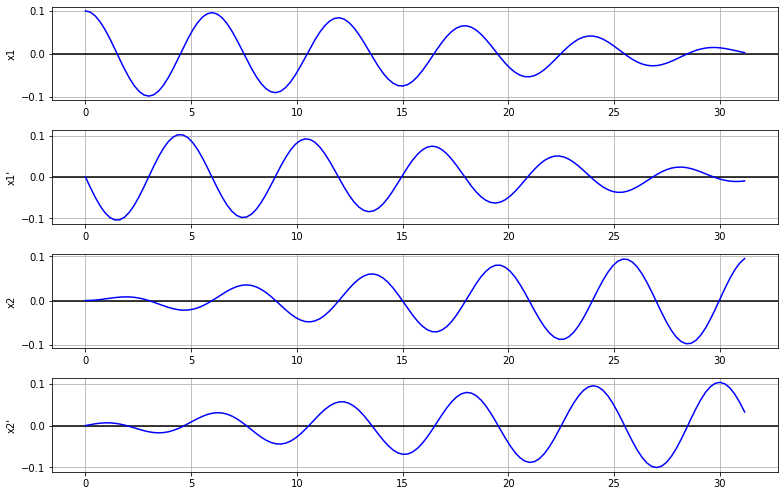

In [30]:
plota_resp_sist(T, yout)

In [31]:
# Poderia ser feito com a matriz diagonalizada de Jordan

# Simulando resp. a x0 usando a Matriz de Transi��o de Estados
# X=[];
# for t=0:0.1:100
#     xx=V*[exp(D(1,1)*t) 0 0 0; 0 exp(D(2,2)*t) 0 0 ; 0 0 exp(D(3,3)*t) 0 ; 0 0 0 exp(D(4,4)*t)]*inv(V);
#     X=[X xx(4)];
# end
# tt=[0:0.1:100];
# figure(5);plot(tt,X)

$$ $$
## 02)
$$ $$

In [32]:
A = array([[5, -1],
           [0,  5]])

D, V = eig(A)

D

array([5., 5.])

In [33]:
V.round(3)

array([[1., 1.],
       [0., 0.]])

In [34]:
A = array([[-5/2, 1/2],
           [-1/2, -3/2]])

D, V = eig(A)

D

array([-2., -2.])

In [35]:
V.round(3)

array([[ 0.707, -0.707],
       [ 0.707, -0.707]])

$$ $$
## 03)
$$ $$

In [36]:
A = array([[3, 1, 1],
           [0, 3, 1],
           [0, 0, 3]])

D, V = eig(A)

mul_mat(inv(V), A, V).round(3)

array([[ 3.,  0., -0.],
       [ 0.,  3.,  0.],
       [ 0.,  0.,  3.]])

In [37]:

A = array([[3, 0, 1],
           [0, 3, 1],
           [0, 0, 3]])

D, V = eig(A)

mul_mat(inv(V), A, V).round(3)

array([[3., 0., 0.],
       [0., 3., 0.],
       [0., 0., 3.]])

$$ $$
## 04)
$$ $$

In [38]:
A = array([[3, -1],
           [-1, 3]])

Não se sabe como aplicar esse teorema.
$$ $$

$$ $$
## 05)
$$ $$
Exercício não muito útil já que Laplace é muito pouco utilizado para controle avançado.
$$ $$
## 06)
$$ $$
Exercício que parece agregar pouco.
$$ $$
## 07)
$$ $$
Análogo ao exercício 01).
$$ $$
## 08)
$$ $$
Análogo ao exercício 01).
$$ $$